https://cs50.harvard.edu/python/2022/psets/8/seasons/

Assuming there are 365 days in a year, there are minutes in that same year (because there are 24 hours in a day and 60 minutes in an hour). But how many minutes are there in two or more years? Well, it depends on how many of those are leap years with 366 days, per the Gregorian calendar, as some of them could have

additional minutes. In fact, how many minutes has it been since you were born? Well, that, too, depends on how many leap years there have been since! There is an algorithm for such, but let’s not reinvent that wheel. Let’s use a library instead. Fortunately, Python comes with a datetime module that has a class called date that can help, per docs.python.org/3/library/datetime.html#date-objects.

In a file called seasons.py, implement a program that prompts the user for their date of birth in YYYY-MM-DD format and then sings prints how old they are in minutes, rounded to the nearest integer, using English words instead of numerals, just like the song from Rent, without any and between words. Since a user might not know the time at which they were born, assume, for simplicity, that the user was born at midnight (i.e., 00:00:00) on that date. And assume that the current time is also midnight. In other words, even if the user runs the program at noon, assume that it’s actually midnight, on the same date. Use datetime.date.today to get today’s date, per docs.python.org/3/library/datetime.html#datetime.date.today.

Structure your program per the below, not only with a main function but also with one or more other functions as well:

In [ ]:
from datetime import date


def main():
    ...


...


if __name__ == "__main__":
    main()


You’re welcome to import other (built-in) libraries, or any that are specified in the below hints. Exit via sys.exit if the user does not input a date in YYYY-MM-DD format. Ensure that your program will not raise any exceptions.

Either before or after you implement seasons.py, additionally implement, in a file called test_seasons.py, one or more functions that test your implementation of any functions besides main in seasons.py thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

In [ ]:
pytest test_seasons.py

# Hints

    Note that the date class comes with quite a few methods and “supported operations,” per docs.python.org/3/library/datetime.html#date-objects. In particular, the class implements __sub__, per docs.python.org/3/library/operator.html#operator.__sub__, overloading - in such a way that subtracting one date object from another returns a timedelta object, which itself comes with several (read-only) “instance attributes,” per docs.python.org/3/library/datetime.html#timedelta-objects.
    Note that the inflect module comes with quite a few methods, per pypi.org/project/inflect. You can install it with: 

In [1]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Solution

In [ ]:
from datetime import date
import inflect
import sys
import re

p = inflect.engine()


def main():

    # Get user input and validate it
    bday = str(input("Date of Birth: "))
    bday = validate_input(bday)

    # Calculate the dates difference in minutes
    today = date.today()
    minutes = minute_converter(bday, today)

    # Final Output
    print(p.number_to_words(minutes, andword="").capitalize() + " minutes")


def validate_input(date):
    # Here I could validate if the range of dates and months were valid too
    # As the goal was simple I skipped this. Only checks the format with regex
    return date if re.match(r"^\d{4}-\d{2}-\d{2}$", date) else sys.exit("Invalid date")


def minute_converter(init, end):

    # Extract each component of the date and turn into an integer
    year, month, day = map(int, init.split('-'))
    bday = date(year, month, day) # Creating the date format

    # Calculating difference of dates and converting to mintues
    diff = (end - bday).days
    diff_in_minutes = diff * 24 * 60 # Multiply the difference of dates in days by 24hours, then by 60 minutes per hour

    return diff_in_minutes


if __name__ == "__main__":
    main()


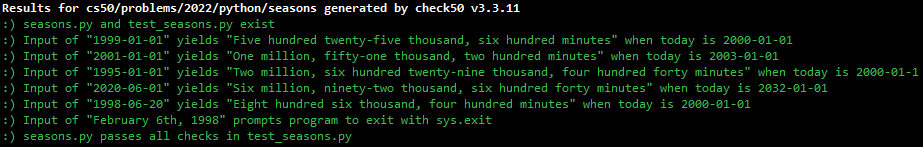

# How to Test

### How to Test seasons.py

Here’s how to test seasons.py manually:

    Run your program with python seasons.py. Ensure your program prompts you for a birthdate. Type a date one year ago from today, in the specified format, then press Enter. Your program should sing print Five hundred twenty-five thousand, six hundred minutes.
    Run your program with python seasons.py. Type a date two years ago from today, in the specified format, then press Enter. Your program should print One million, fifty-one thousand, two hundred minutes.
    Run your program with python seasons.py. Type a date of your choice, but this time use an invalid format. Press Enter and your program should exit using sys.exit without raising an Exception.

### How to Test test_seasons.py

To test your tests, run pytest test_seasons.py. Try to use correct and incorrect versions of seasons.py to determine how well your tests spot errors:

    Ensure you have a correct version of seasons.py. Run your tests by executing pytest test_seasons.py. pytest should show that all of your tests have passed.
    Modify one of the functions you’ve implemented in seasons.py and imported into test_seasons.py. One of your functions might, for example, fail to raise a ValueError when it should. Run your tests by executing pytest test_seasons.py. pytest should show that at least one of your tests has failed.
    Continue to modify the behavior of seasons.py, creating (predictably) incorrect versions of your implementation. Run your tests by executing pytest test_seasons.py. Do the tests you expect to fail, fail?
